In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('D:/Study/VII sem/DL/dl_yt/other_files/Google_stock.csv')


symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object
0
1258


<AxesSubplot:xlabel='Date'>

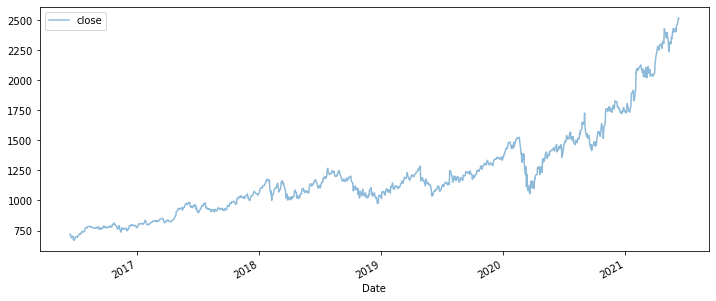

In [2]:
# =============================================================================
# Step 1 - Data pre processing
# =============================================================================

# Checking if the data has any discrapancies 
print(df.dtypes)
print(df['date'].isnull().sum())
print(len(df['date'].unique())) #We have data for 1258 days

# Converting the date from object to datetime
df['Date']=pd.to_datetime(df['date'])

google_stock = df[['Date','close']]
google_stock.set_index('Date',inplace = True)
google_stock.plot(figsize=(12,5),alpha=0.5)


pvalue =  0.9986307166841111  if above 0.05 ?, data is not stationary


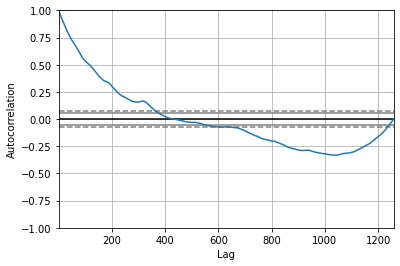

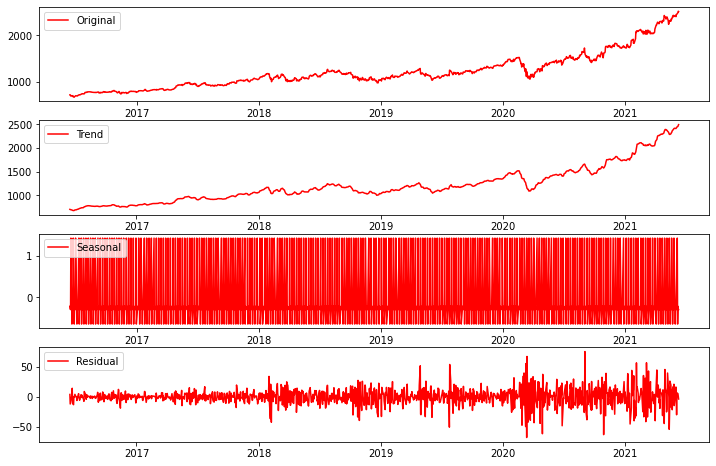

In [24]:
# =============================================================================
# Step 2 - Preliminary tests
# =============================================================================
#Checking if the data is stationary?
#Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(google_stock)
print("pvalue = ", pvalue, " if above 0.05 ?, data is not stationary")
# pvalue =  0.9986307166841111

# Clearly data isn't stationary so we must use “Integrated (I)” concept to make data stationary while building Atuo ARIMA model

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(google_stock.close) 
#Horizontal bands indicate 95% and 99% (dashed) confidence bands
#A strong positive correlation for lags below 400 (days)


#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose
freq=30 
decomposed = seasonal_decompose(google_stock, model='additive',period=5) 

trend = decomposed.trend
seasonal = decomposed.seasonal 
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(google_stock['close'], label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.show()


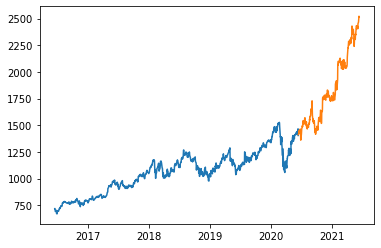

In [56]:
# =============================================================================
# Step 3 - Split data
# =============================================================================
# by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series
#df_log= np.log(google_stock)
#Split data into train and test
size = int(len(google_stock) * 0.80)
X_train, X_test = google_stock[0:size], google_stock[size:len(df_log)]
y_pred=X_test.copy()
plt.plot(X_train)
plt.plot(X_test)

In [57]:
# =============================================================================
# Step 4 - Atuo - Arima buid model
# =============================================================================
from pmdarima.arima import auto_arima

#Autoarima gives us best model suited for the data
'''
Auto-Regressive (p) -> Number of autoregressive terms.
Integrated (d) -> Number of nonseasonal differences needed for stationarity.
Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
'''

arima_model = auto_arima(X_train['close'],
                         start_p = 1, start_q = 1,max_p = 3, max_q = 3, 
                          seasonal = False, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = False)           
  
# print the summary 
arima_model.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8757.327, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8733.949, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8735.174, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8734.851, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8733.599, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8735.481, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8736.431, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8713.061, Time=0.85 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8735.404, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8712.561, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8678.468, Time=1.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8678.236, Time=1.71 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8734.662, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8709.859, Time=0.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8677.775, Time=1.37 sec

Best mode

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -4331.888
Date:                Tue, 01 Feb 2022   AIC                           8677.775
Time:                        13:30:52   BIC                           8712.164
Sample:                             0   HQIC                          8690.842
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5868      2.126      1.217      0.224      -1.579       6.753
ar.L1         -1.8508      0.039    -47.068      0.000      -1.928      -1.774
ar.L2         -1.0522      0.057    -18.586      0.000      -1.163      -0.941
ar.L3         -0.0671      0.027     -2.486      0.013      -0.120      -0.014
ma.L1          1.7530      0.032     54.127      0.000       1.690       1.816
ma.L2          0.8607      0.029     29.760      0.000       0.804       0.917
sigma2       324.5781      7.511     43.214      0.000     309.857     339.299
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1942.95
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               7.40   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

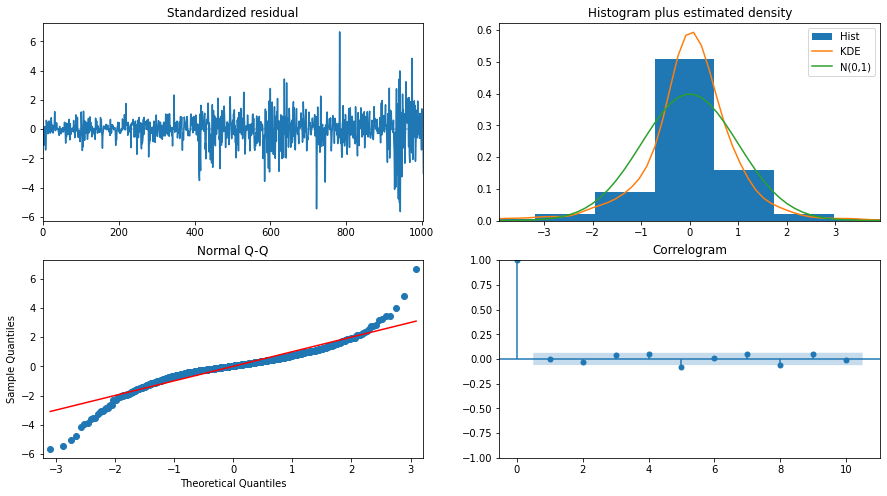

In [58]:
arima_model.plot_diagnostics(figsize=(15,8))
plt.show()

In [59]:
# =============================================================================
# Step 5 - Prediction on Test
# =============================================================================

import math
from sklearn.metrics import mean_squared_error
#Prediction
prediction_arima=arima_model.predict(len(X_test))
y_pred["Auto-ARIMA Prediction"]=prediction_arima

rmse_arima=np.sqrt(mean_squared_error(y_pred["close"],y_pred["Auto-ARIMA Prediction"]))
print("Root Mean Square Error ARIMA: ",rmse_arima)


Root Mean Square Error ARIMA:  440.5207208452602


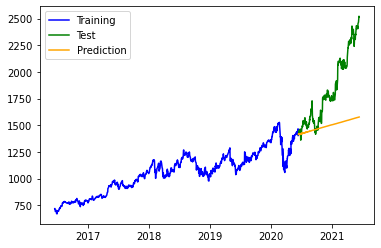

<Figure size 1080x576 with 0 Axes>

In [60]:
plt.plot(X_train, label='Training', color='blue')
plt.plot(X_test, label='Test', color='green')
plt.plot(y_pred["Auto-ARIMA Prediction"], label='Prediction', color='orange')
plt.legend(loc='upper left')
plt.figure(figsize=(15,8))
plt.show()


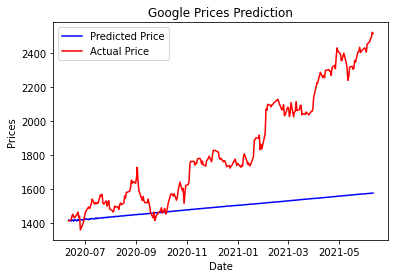

In [76]:
test_set_range = X_test.index

plt.plot(test_set_range, y_pred['Auto-ARIMA Prediction'], color='blue',label='Predicted Price')
plt.plot(test_set_range, X_test['close'], color='red', label='Actual Price')
plt.title('Google Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')
plt.show()